## kNN Topics:

The k-Nearest Neighbors (k-NN) algorithm is a simple, yet powerful, machine learning algorithm used for both classification and regression tasks. It is a type of instance-based learning, which means it makes predictions based on the instances (data points) in the training set.

The k-nearest neighbors (KNN) algorithm is a classic technique in machine learning. Unlike other algorithms that create a model during the training phase, **KNN essentially "remembers" the training dataset and uses it directly for predictions.** Here's how the training and prediction process works:

- Training
Store Training Data: The algorithm simply stores all the training data points. There is no explicit training phase where the model parameters are learned. The training data itself serves as the model.

- Feature Scaling: It's often recommended to perform feature scaling (e.g., normalization or standardization) before using KNN, as it relies on distance calculations. Features on different scales can lead to biased distance measurements.

- Prediction
Calculate Distance: When making a prediction for a new data point, the algorithm calculates the distance (commonly Euclidean distance) between the new data point and all points in the training dataset.

- Find Nearest Neighbors: It identifies the 'k' training data points that are closest to the new data point. The value of 'k' is a hyperparameter that needs to be chosen carefully. A smaller 'k' can make the model sensitive to noise, while a larger 'k' can make it less sensitive.

- Vote/Average:

    - For Classification: The algorithm counts the frequency of each class among the k-nearest neighbors and assigns the class with the highest count to the new data point.
    
    - For Regression: The algorithm takes the average of the target values of the k-nearest neighbors to predict the value for the new data point.

The simplicity of KNN makes it easy to implement and understand, but it can be computationally expensive, especially with large datasets, as it involves calculating distances for each new prediction. Techniques like KD-trees or Ball-trees can be used to speed up the process.

### Key Concepts

1. Instance based learning:
- k-NN algorithm memorizes the training dataset and uses it directly to make predictions without any explicit model training process.

2. Distance Metric:
- To make predictions, k-NN relies on a distance metric to find the "k" closest neighbors to a given query point. Common distance metrics include:
    - Euclidean Distance : $$ d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$
    - Manhattan distance: $$ d(p, q) = \sum_{i=1}^{n} |p_i - q_i| $$
    - Minkowski distance: $$ d(p, q) = \left( \sum_{i=1}^{n} |p_i - q_i|^p \right)^{\frac{1}{p}} $$
    - Chebyshev distance: $$ d(p, q) = \max_{i} |p_i - q_i| $$
    - Cosine Similarity: $$ \text{Cosine Similarity}(p, q) = \frac{\sum_{i=1}^{n} p_i q_i}{\sqrt{\sum_{i=1}^{n} p_i^2} \sqrt{\sum_{i=1}^{n} q_i^2}} $$
    - Cosine Distance: $$ d(p, q) = 1 - \text{Cosine Similarity}(p, q) $$
      

![Distance metrics](knn-image.png)

3. Choosing k:
- The value of "k" is a user-defined parameter that determines the number of nearest neighbors to consider. The choice of "k" can significantly affect the performance of the algorithm:
    - A small "k" may lead to overfitting.
    - A large "k" may lead to underfitting.

4. Classification:
- For classification tasks, the algorithm assigns the class label that is most common among the "k" nearest neighbors (majority voting).

5. Regression:
- For regression tasks, the algorithm predicts the average value of the target variable of the "k" nearest neighbors

### Example illustration

Dataset: Assume we have a dataset with two features (X1, X2) and a binary target variable (Class 0 or Class 1):

|X1|	X2|	Class|
|--------|--------|----------|
|1.0	|2.0	|0|
|1.5	|1.8	|0|
|2.0	|2.0	|1|
|2.5	|2.5	|1|
|3.0	|3.0	|1|

- Query Point: Suppose we want to predict the class for a new data point (2.0, 2.2).

- Steps: Calculate the distance between the query point and each point in the dataset.

- Identify the "k" nearest neighbors.

- Assign the class label based on the majority voting.

- Calculations: Distances to the query point (2.0, 2.2) using Euclidean distance:

    Distance to (1.0, 2.0): $$ sqrt((2.0−1.0)^2+(2.2−2.0)^2) ≈ 1.02 $$
    
    Distance to (1.5, 1.8): $$ sqrt((2.0−1.5)^2+(2.2−1.8)^2) ≈ 0.64 $$
    
    Distance to (2.0, 2.0): $$ sqrt((2.0−2.0)^2+(2.2−2.0)^2) ≈ 0.20 $$
    
    Distance to (2.5, 2.5): $$ sqrt((2.0−2.5)^2+(2.2−2.5)^2) ≈ 0.58 $$
    
    Distance to (3.0, 3.0): $$ sqrt((2.0−3.0)^2+(2.2−3.0)^2) ≈ 1.28 $$

- if k = 3:
  - Nearest neighbors: (2.0, 2.0), (2.5, 2.5), (1.5, 1.8)
  - Classes of nearest neighbors: 1, 1, 0
  - Majority class: 1

- The new data point (2.0, 2.2) would be classified as Class 1.

In [1]:
# for regression (0.64+0.2+0.58)/3

0.47333333333333333

### How to determine k Value?

#### Cross-Validation
Cross-validation is one of the most effective ways to determine the optimal "k". The process involves:

- Splitting the data into training and validation sets.
- Training the k-NN model with different values of "k".
- Evaluating the performance on the validation set using a suitable metric (e.g., accuracy, F1 score, mean squared error).
- Selecting the "k" that provides the best performance on the validation set.

The optimal k value is 13
Accuracy: 0.9333
Precision: 0.9345
Recall: 0.9333
F1 Score: 0.9333

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



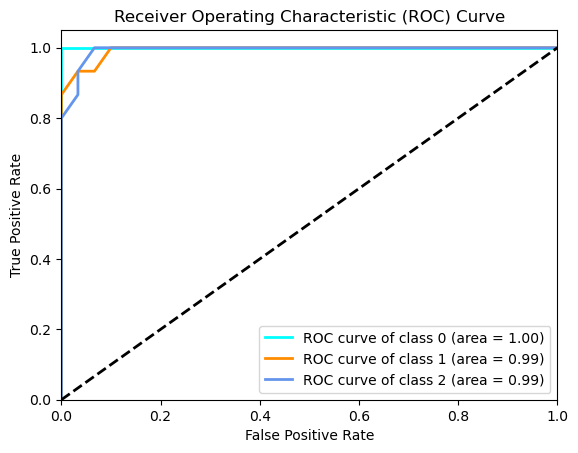

     k  Cross-Validated Accuracy
0    1                  0.961818
1    2                  0.961818
2    3                  0.961818
3    4                  0.932727
4    5                  0.952727
5    6                  0.942727
6    7                  0.960909
7    8                  0.961818
8    9                  0.970909
9   10                  0.961818
10  11                  0.961818
11  12                  0.952727
12  13                  0.971818
13  14                  0.971818
14  15                  0.971818
15  16                  0.952727
16  17                  0.962727
17  18                  0.942727
18  19                  0.961818
19  20                  0.961818


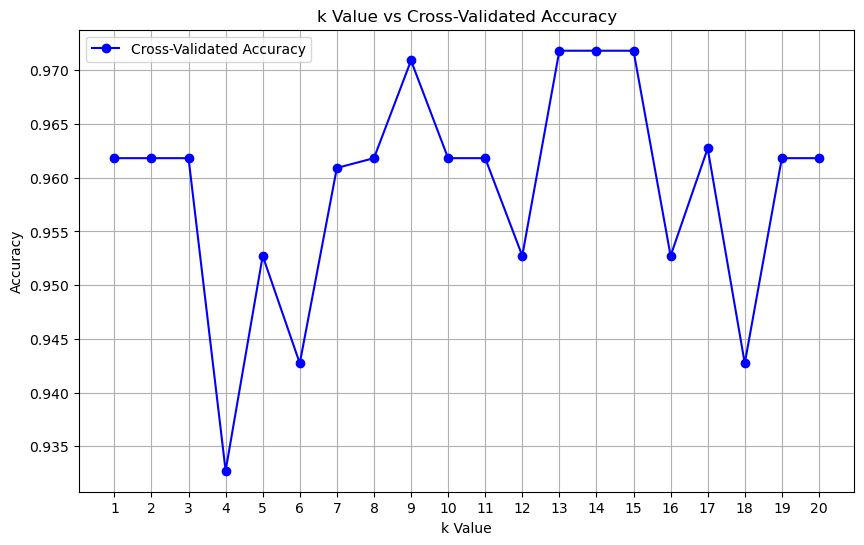

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ( accuracy_score, precision_score, recall_score, f1_score, 
                                roc_curve, auc, confusion_matrix, classification_report )
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define a range of k values to try
k_range = range(1, 21)

# Perform cross-validation for each k value
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k value
optimal_k = k_range[np.argmax(cv_scores)]
print(f'The optimal k value is {optimal_k}')

# Train the k-NN classifier with the optimal k value
knn = KNeighborsClassifier( metric='euclidean', n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Plot ROC curves
y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display the cross-validation results in a table
results_df = pd.DataFrame({'k': list(k_range), 'Cross-Validated Accuracy': cv_scores})
print(results_df)

# # Display the table in a readable format
# fig, ax = plt.subplots(figsize=(8, 6))  # set size frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis
# ax.set_frame_on(False)  # no visible frame
# tabla = pd.plotting.table(ax, results_df, loc='center', colWidths=[0.2]*len(results_df.columns))  # where df is your data frame
# tabla.auto_set_font_size(False)  # Activate set fontsize manually
# tabla.set_fontsize(12)  # if ++fontsize is necessary ++colWidths
# tabla.scale(1.2, 1.2)  # change size table
# plt.title('k-NN Cross-Validated Accuracy Results')
# plt.show()

# Plot k values vs metrics 
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='-', color='b', label='Cross-Validated Accuracy')
plt.xlabel('k Value') 
plt.ylabel('Accuracy') 
plt.title('k Value vs Cross-Validated Accuracy') 
plt.xticks(k_range) 
plt.legend() 
plt.grid(True)

### How to decide the distance metric for kNN

1. Nature of the Data:
- Continuous Features: Euclidean, Manhattan, or Minkowski distances are commonly used.
- Categorical Features: Hamming distance or specialized similarity measures can be applied.

2. Feature Scaling:
- Standardization: If features have different scales, standardize the data to ensure that each feature contributes equally to the distance.
- Normalization: Normalize the data to a common range (e.g., [0,1]) if using metrics sensitive to scale, like Euclidean distance.

3. Dimensionality:
- High Dimensions: Cosine similarity can be effective for high-dimensional spaces, such as text data.

4. Domain Knowledge:
- Leverage domain knowledge to select a metric that aligns with the underlying structure of the data. For example, in geographical data, Manhattan distance might be more appropriate due to grid-like urban layouts.

5. Experimentation and Validation:
- Experiment with different distance metrics and use cross-validation to evaluate their performance. Choose the metric that yields the best results based on validation scores.

### Assumptions of kNN algorithm:

1. Feature Homogeneity
- Assumption: The features used in the k-NN algorithm are homogeneous, meaning they are measured on the same scale and represent similar types of information.
- Implication: Features with different scales or units can lead to incorrect distance calculations. Therefore, it is essential to standardize or normalize the data.

2. Distance Metric Relevance
- Assumption: The chosen distance metric (e.g., Euclidean, Manhattan) is appropriate for the data and captures the true similarity between instances.
- Implication: The distance metric should accurately reflect the relationship between data points. For example, Euclidean distance is suitable for continuous features, while Hamming distance may be more appropriate for categorical features.

3. Locality of Data
- Assumption: Data points that are close to each other in the feature space are more likely to have similar target values.
- Implication: The k-NN algorithm relies on the idea that similar instances are near each other. This assumption may not hold if the data is highly noisy or if there are complex global patterns that the algorithm cannot capture.

4. Sufficient Training Data
- Assumption: There is sufficient training data to cover the feature space adequately.
- Implication: k-NN performs better with larger datasets, as it relies on finding nearest neighbors. Insufficient data can lead to poor generalization.

5. Independence of Instances
- Assumption: Each instance in the dataset is independent of the others.
- Implication: The k-NN algorithm assumes that the value of one instance does not influence the value of another. This assumption may not hold in time series or spatial data where observations are dependent.

6. Balanced Class Distribution
- Assumption: The classes are relatively balanced.
- Implication: Imbalanced datasets can lead to biased predictions, where the majority class dominates the predictions. Techniques like resampling or adjusting class weights may be needed to handle class imbalance.

7. Curse of Dimensionality
- Assumption: There should be minimal features so that The algorithm can effectively handle the dimensionality of the data.
- Implication: High-dimensional data can dilute the effectiveness of the distance metric, leading to poor performance. Dimensionality reduction techniques (e.g., PCA) can help mitigate this issue.

### Advantages and disadvanatages of using kNN

##### Advanatages
1. Simplicity:
- k-NN is easy to understand and implement. It requires no explicit training phase and is based on simple distance calculations.

2. Versatility:
- k-NN can be used for both classification and regression tasks. It works well for multi-class classification problems.

3. No Assumptions:
- k-NN makes no assumptions about the underlying data distribution. It is a non-parametric algorithm, making it flexible in handling different types of data.

4. Adaptability:
- It can easily adapt to new data. As new data points are added, the algorithm can make predictions without retraining.

5. Feature Interactions:
- k-NN naturally captures interactions between features, as it considers the entire feature space when making predictions.

##### Disadvanatages

1. Computational Complexity:
- k-NN can be computationally expensive, especially with large datasets. The algorithm requires calculating the distance between the query point and all points in the training set, which can be slow.

2. Memory Intensive:
- The algorithm stores all training data, making it memory-intensive. This can be a challenge for large datasets.

3. Sensitivity to Irrelevant Features:
- k-NN is sensitive to irrelevant or redundant features, as these can affect the distance calculations. Feature selection and normalization are often necessary.

4. Curse of Dimensionality:
- In high-dimensional spaces, the distance between points becomes less meaningful, leading to poor performance. Dimensionality reduction techniques like PCA can help mitigate this issue.

5. Class Imbalance:
- k-NN can struggle with imbalanced datasets, where the majority class may dominate the predictions. Techniques like resampling or adjusting class weights may be needed.

6. Choice of k:
- The choice of the parameter 𝑘 is crucial. A small 𝑘 can lead to overfitting, while a large 𝑘 can lead to underfitting. Cross-validation is often used to determine the optimal k.

Also Ref: https://www.analyticsvidhya.com/blog/2017/09/30-questions-test-k-nearest-neighbors-algorithm/

Ref: https://varshasaini.in/kd-tree-and-ball-tree-knn-algorithm/